# Initial data exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline

In [2]:
sns.set()

First we locate the data:

In [3]:
!ls -ltrh ../data

total 15M
-rw-rw-r-- 1 guzzo guzzo 1,7M Dez  5 18:48 machine_learning_challenge_labeled_data.csv.gz
-rw-rw-r-- 1 guzzo guzzo  13M Dez  5 18:48 machine_learning_challenge_order_data.csv.gz


The files are quite small so there's no concern for RAM space when loading them.

#### Orders table

Let's first load the orders:

In [4]:
order_data = pd.read_csv(
    "../data/machine_learning_challenge_order_data.csv.gz"
)

A quick look at the top of the table:

In [5]:
order_data.head()

,customer_id,order_date,order_hour,customer_order_rank,is_failed,voucher_amount,delivery_fee,amount_paid,restaurant_id,city_id,payment_id,platform_id,transmission_id
0,000097eabfd9,2015-06-20,19,1.0,0,0.0,0.000,11.46960,5803498,20326,1779,30231,4356
1,0000e2c6d9be,2016-01-29,20,1.0,0,0.0,0.000,9.55800,239303498,76547,1619,30359,4356
2,000133bb597f,2017-02-26,19,1.0,0,0.0,0.493,5.93658,206463498,33833,1619,30359,4324
3,00018269939b,2017-02-05,17,1.0,0,0.0,0.493,9.82350,36613498,99315,1619,30359,4356
4,0001a00468a6,2015-08-04,19,1.0,0,0.0,0.493,5.15070,225853498,16456,1619,29463,4356


#### Labels

In [6]:
labels_table = pd.read_csv(
    "../data/machine_learning_challenge_labeled_data.csv.gz"
)

In [7]:
labels_table.head()

,customer_id,is_returning_customer
0,000097eabfd9,0
1,0000e2c6d9be,0
2,000133bb597f,1
3,00018269939b,0
4,0001a00468a6,0


In [8]:
labels_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245455 entries, 0 to 245454
Data columns (total 2 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   customer_id            245455 non-null  object
 1   is_returning_customer  245455 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


We can check that we have indeed 245455 unique users:

In [9]:
order_data.customer_id.nunique()

245455

Now a more detailed look at the shape and type of columns.
This also tells us how many invalid or NA values we have:

In [10]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786600 entries, 0 to 786599
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   customer_id          786600 non-null  object 
 1   order_date           786600 non-null  object 
 2   order_hour           786600 non-null  int64  
 3   customer_order_rank  761833 non-null  float64
 4   is_failed            786600 non-null  int64  
 5   voucher_amount       786600 non-null  float64
 6   delivery_fee         786600 non-null  float64
 7   amount_paid          786600 non-null  float64
 8   restaurant_id        786600 non-null  int64  
 9   city_id              786600 non-null  int64  
 10  payment_id           786600 non-null  int64  
 11  platform_id          786600 non-null  int64  
 12  transmission_id      786600 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 78.0+ MB


In [11]:
order_data.isnull().sum()

customer_id                0
order_date                 0
order_hour                 0
customer_order_rank    24767
is_failed                  0
voucher_amount             0
delivery_fee               0
amount_paid                0
restaurant_id              0
city_id                    0
payment_id                 0
platform_id                0
transmission_id            0
dtype: int64

The `.describe()` method shows how the numeric data is distributed:

In [12]:
order_data.describe()

,order_hour,customer_order_rank,is_failed,voucher_amount,delivery_fee,amount_paid,restaurant_id,city_id,payment_id,platform_id,transmission_id
count,786600.000000,761833.000000,786600.000000,786600.000000,786600.00000,786600.000000,7.866000e+05,786600.000000,786600.000000,786600.000000,786600.000000
mean,17.588796,9.436810,0.031486,0.091489,0.18118,10.183271,1.628641e+08,47179.750497,1668.509077,29868.529382,4253.246112
std,3.357192,17.772322,0.174628,0.479558,0.36971,5.618121,8.783082e+07,25904.630565,87.192665,1160.893265,572.855666
min,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,7.349800e+04,230.000000,1491.000000,525.000000,212.000000
25%,16.000000,1.000000,0.000000,0.000000,0.00000,6.648120,8.602350e+07,24799.000000,1619.000000,29463.000000,4228.000000
50%,18.000000,3.000000,0.000000,0.000000,0.00000,9.027000,1.696135e+08,46467.000000,1619.000000,29815.000000,4324.000000
75%,20.000000,10.000000,0.000000,0.000000,0.00000,12.213000,2.284335e+08,67886.000000,1779.000000,30231.000000,4356.000000
max,23.000000,369.000000,1.000000,93.398900,9.86000,1131.030000,3.404535e+08,100205.000000,1811.000000,30423.000000,21124.000000


With a quick glance at the quartiles we can see that most numeric columns are quite skewed.

It can also be useful to see how many unique values there are for each feature:

In [14]:
order_data.nunique()

customer_id            245455
order_date                776
order_hour                 24
customer_order_rank       369
is_failed                   2
voucher_amount            911
delivery_fee               98
amount_paid              6471
restaurant_id           13569
city_id                  3749
payment_id                  5
platform_id                14
transmission_id            10
dtype: int64

### Missing values

The only missing values are in the `customer_order_rank` column
and we are going to impute them with zeros for the time being.
It is a reasonably safe assumption that we can change later.

In [15]:
order_data = order_data.fillna(0)

### Data types

Data types were automatically inferred by pandas and are all over the place:
- Some columns are ints while they should be strings (e.g. all types of IDs),
  booleans, or categories;
- `customer_order_rank` should be an `int` while it's a float
  (this is because it contained invalid data at ingestion time, which not defined within
  the integer type, so it was converted to float).
  Now that we have imputed the missing data we can easily fix this;
- `order_date` and `order_hour` are two elements of a datetime objects.
   While the two might be useful separate features, we should have a single column
   for the time being.
  
Lets put some order to this.

In [16]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786600 entries, 0 to 786599
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   customer_id          786600 non-null  object 
 1   order_date           786600 non-null  object 
 2   order_hour           786600 non-null  int64  
 3   customer_order_rank  786600 non-null  float64
 4   is_failed            786600 non-null  int64  
 5   voucher_amount       786600 non-null  float64
 6   delivery_fee         786600 non-null  float64
 7   amount_paid          786600 non-null  float64
 8   restaurant_id        786600 non-null  int64  
 9   city_id              786600 non-null  int64  
 10  payment_id           786600 non-null  int64  
 11  platform_id          786600 non-null  int64  
 12  transmission_id      786600 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 78.0+ MB


Here's `platform_id` specifically:

In [17]:
order_data['platform_id'].dtype

dtype('int64')

In [18]:
order_data['platform_id'].dtype == 'int'

True

and `customers_order_rank`:

In [19]:
order_data['customer_order_rank'].dtype

dtype('float64')

This can be fixed in one line:

In [20]:
order_data['customer_order_rank'] = order_data['customer_order_rank'].astype(np.int64)

and now if we check the dtype we find as expected, and integer:

In [21]:
order_data['customer_order_rank'].dtype

dtype('int64')

Let's convert all IDs that are integers to (unordered) category:

In [22]:
for col in order_data.columns:
    if col.endswith('_id') and order_data[col].dtype == 'int':
        order_data[col] = order_data[col].astype('str').astype('category')
    else:
        continue

Now `is_failed`:

In [23]:
order_data['is_failed'] = order_data['is_failed'].astype('bool')

We can verify the success of the operation with `.info()`: 

In [24]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786600 entries, 0 to 786599
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   customer_id          786600 non-null  object  
 1   order_date           786600 non-null  object  
 2   order_hour           786600 non-null  int64   
 3   customer_order_rank  786600 non-null  int64   
 4   is_failed            786600 non-null  bool    
 5   voucher_amount       786600 non-null  float64 
 6   delivery_fee         786600 non-null  float64 
 7   amount_paid          786600 non-null  float64 
 8   restaurant_id        786600 non-null  category
 9   city_id              786600 non-null  category
 10  payment_id           786600 non-null  category
 11  platform_id          786600 non-null  category
 12  transmission_id      786600 non-null  category
dtypes: bool(1), category(5), float64(3), int64(2), object(2)
memory usage: 48.9+ MB


Now onto the datetime data.
We can put together date and hour with the following line:

In [25]:
order_data['order_date'] + ' ' + order_data['order_hour'].astype('str').str.pad(width=2, fillchar='0')

0         2015-06-20 19
1         2016-01-29 20
2         2017-02-26 19
3         2017-02-05 17
4         2015-08-04 19
              ...      
786595    2016-09-30 20
786596    2016-08-17 21
786597    2016-09-15 21
786598    2016-04-02 19
786599    2015-05-30 20
Length: 786600, dtype: object

and then convert it to datetime dtype with the appropriate pandas utility function `to_datetime`:

In [26]:
order_data['order_datetime'] = pd.to_datetime(
    order_data['order_date'] + ' ' + order_data['order_hour'].astype('str').str.pad(width=2, fillchar='0'),
    format='%Y-%m-%d %H',
)

Now we can get rid of the redundant columns:

In [27]:
order_data = order_data.drop(columns=['order_date', 'order_hour'])

In [28]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786600 entries, 0 to 786599
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          786600 non-null  object        
 1   customer_order_rank  786600 non-null  int64         
 2   is_failed            786600 non-null  bool          
 3   voucher_amount       786600 non-null  float64       
 4   delivery_fee         786600 non-null  float64       
 5   amount_paid          786600 non-null  float64       
 6   restaurant_id        786600 non-null  category      
 7   city_id              786600 non-null  category      
 8   payment_id           786600 non-null  category      
 9   platform_id          786600 non-null  category      
 10  transmission_id      786600 non-null  category      
 11  order_datetime       786600 non-null  datetime64[ns]
dtypes: bool(1), category(5), datetime64[ns](1), float64(3), int64(1), object

### Data distribution and collinearity

Using a scatter matrix we can quickly highlight obvious correlation between columns,
and look at each individual columns distribution.

In [29]:
order_data.columns

Index(['customer_id', 'customer_order_rank', 'is_failed', 'voucher_amount',
       'delivery_fee', 'amount_paid', 'restaurant_id', 'city_id', 'payment_id',
       'platform_id', 'transmission_id', 'order_datetime'],
      dtype='object')

We'll take only numerical data: 

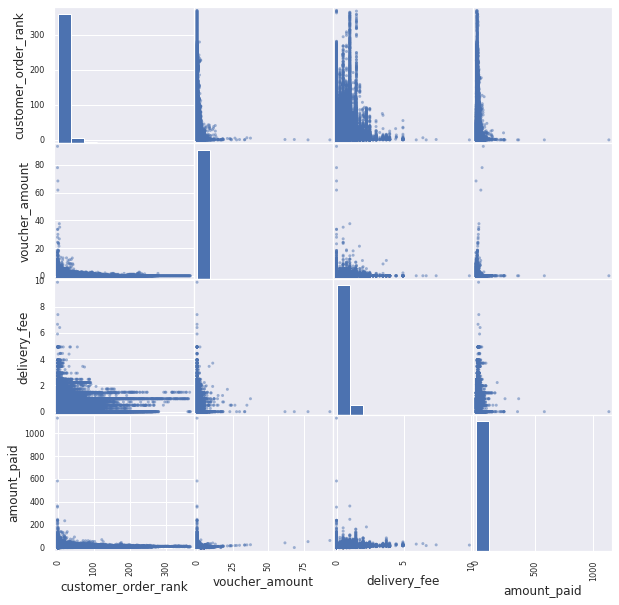

In [30]:
scatter_matrix(
    order_data[
        ['customer_order_rank', 'voucher_amount', 'delivery_fee', 'amount_paid']
    ],
    figsize=(10, 10),
);

No obvious correlation is visible.
We can also see how all columns' distributions are very skewed and not normally distributed.

We can calculate the actual correlation value (Pearson):

In [31]:
order_data.corr()

,customer_order_rank,is_failed,voucher_amount,delivery_fee,amount_paid
customer_order_rank,1.000000,-0.093804,-0.029814,-0.009214,-0.065505
is_failed,-0.093804,1.000000,0.021331,0.014772,0.011820
voucher_amount,-0.029814,0.021331,1.000000,-0.014310,-0.143809
delivery_fee,-0.009214,0.014772,-0.014310,1.000000,0.112384
amount_paid,-0.065505,0.011820,-0.143809,0.112384,1.000000


We can visualize this using a heatmap and make it more immediately understandable:

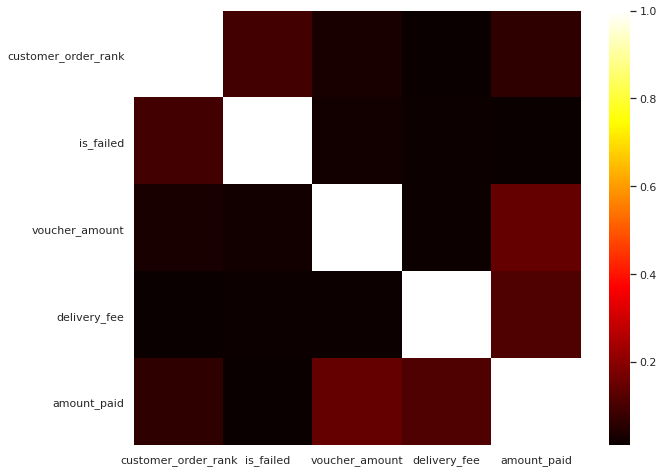

In [32]:
_, ax = plt.subplots(1,1, figsize=(10,8))
sns.heatmap(np.abs(order_data.corr()), ax=ax, cmap='hot');

In this heatmap the brighter the cells, the more correlated the columns.
We can spot the following slight correlations:
- `customer_order_rank` and `is_returning_customer`, which might show an important
  predictor for returning customers;
<!-- - `transmission_id` and `is_failed`, which might highlight some specific issue
  with a specific transmission system. -->

We can summarise the table by collecting high correlation values
(i.e. absolute value greater than 0.8) as follows:

In [33]:
(np.abs(order_data.corr())>0.8).sum()

customer_order_rank    1
is_failed              1
voucher_amount         1
delivery_fee           1
amount_paid            1
dtype: int64

This shows that there is no high correlation between any columns
(the value `1` comes from the diagonal of the matrix,
which is always equal to one).

### Daily orders

We can extract the number of order each day in the dataset:

In [34]:
daily_orders = order_data.set_index('order_datetime')['customer_id'].resample('D').count()
daily_orders

order_datetime
2012-05-17       1
2012-05-18       0
2012-05-19       0
2012-05-20       0
2012-05-21       0
              ... 
2017-02-23    1577
2017-02-24    1969
2017-02-25    2123
2017-02-26    3234
2017-02-27    1805
Freq: D, Name: customer_id, Length: 1748, dtype: int64

Plotting the data will help us spot patterns like weekly seasonality and big holidays such as Christmas and New Year's eve:

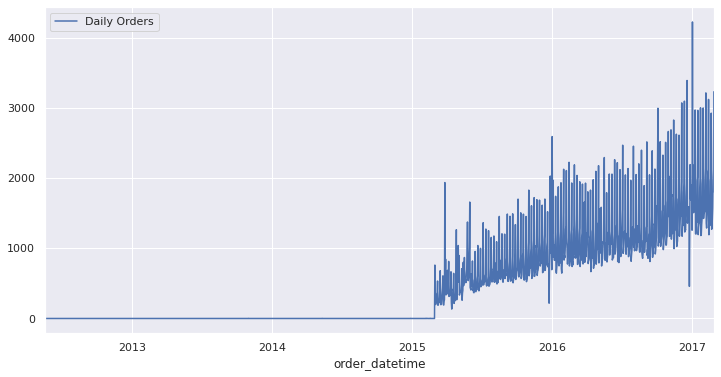

In [35]:
daily_orders.plot(
    figsize=(12,6),

#     logy=True,
    label='Daily Orders',
    legend=True,
);

The data before March 2015 is very sparse.
Without investigating further (there's not enough time),
we'll just remove all data before that.

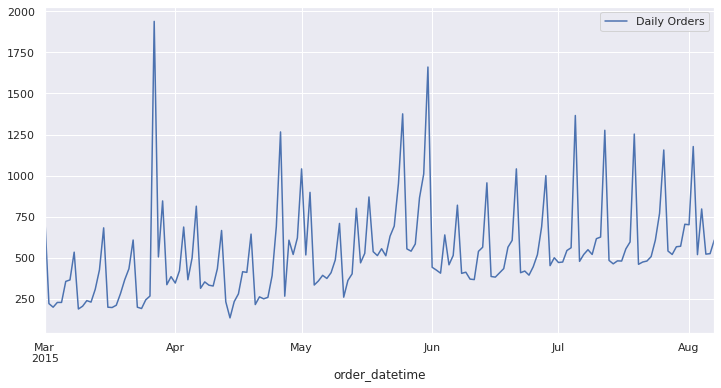

In [36]:
daily_orders['2015-03-01':'2015-08-07'].plot(
    figsize=(12,6),
#     logy=True,
    label='Daily Orders',
    legend=True,
);

Beside the obvious Christmas and New Year's Eve anomalies,
I zoomed in onto the April-May period, which looks a bit funky.
This is a probable sign of several holidays in this time period,
which might hint at the fact the we are looking at a EU country
(several EU countries happen to have a concentration of holidays
within this time frame).

Without knowing the country we are looking at
(assuming the synthetic data represents one correctly)
it is very difficult to use holidays information.
For the sake of time I will stick with Christmas and New Years' only.

#### Hourly orders

In [37]:
hourly_orders = order_data.set_index('order_datetime')['customer_id'].resample('H').count()
hourly_orders

order_datetime
2012-05-17 19:00:00      1
2012-05-17 20:00:00      0
2012-05-17 21:00:00      0
2012-05-17 22:00:00      0
2012-05-17 23:00:00      0
                      ... 
2017-02-27 19:00:00    308
2017-02-27 20:00:00    234
2017-02-27 21:00:00    156
2017-02-27 22:00:00     55
2017-02-27 23:00:00     23
Freq: H, Name: customer_id, Length: 41933, dtype: int64

In [38]:
hourly_orders.describe()

count    41933.000000
mean        18.758496
std         51.194657
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max        756.000000
Name: customer_id, dtype: float64

By looking at a 2-week period around 2017-01-01 we can observe the daily seasonality
and the anomalies of holidays (25th, 31th) in more detail:

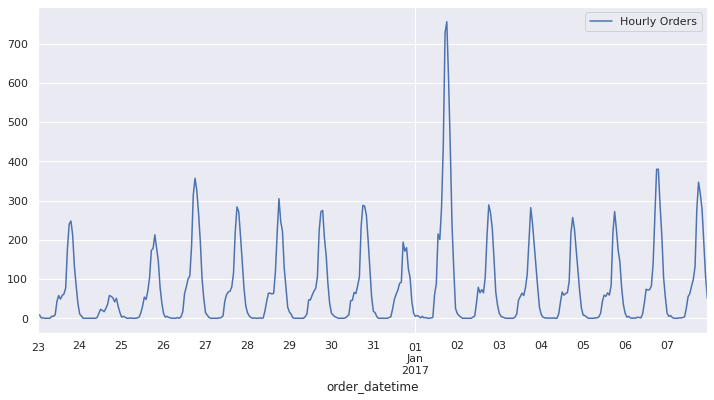

In [39]:
hourly_orders['2016-12-23':'2017-01-07'].plot(
    figsize=(12,6),
#     logy=True,
    label='Hourly Orders',
    legend=True,
);

#### Intra-day seasonality

Seasonality patterns could produce meaningful predictive features.
Here's how many orders we have in total for each hour of the day:

In [40]:
total_orders_per_hour = order_data.groupby(order_data['order_datetime'].dt.time)['customer_id'].count()

total_orders_per_hour

order_datetime
00:00:00      4627
01:00:00      2425
02:00:00      1187
03:00:00       443
04:00:00       137
05:00:00        62
06:00:00        83
07:00:00       158
08:00:00       456
09:00:00      1239
10:00:00      4319
11:00:00     19062
12:00:00     29148
13:00:00     31105
14:00:00     30323
15:00:00     34286
16:00:00     48877
17:00:00     90782
18:00:00    129654
19:00:00    134030
20:00:00    108739
21:00:00     68223
22:00:00     33403
23:00:00     13832
Name: customer_id, dtype: int64

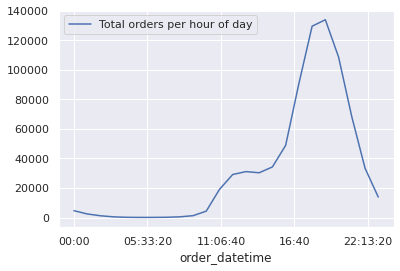

In [41]:
total_orders_per_hour.plot(label="Total orders per hour of day", legend=True);

#### Time-based features

This visualization shows how the distribution of orders is bimodal,
with one peak centered around 13:00 (lunch) and a second centered around 19:00 (dinner).
Using the hour of the day as a feature should capture this information.

Other information that can be extracted and used as a feature is:
- which day of the week an order was submitted;
- was the order day a holiday (25/12, 31/12, 01/12);
- how long ago was the last order of the customer
  (Assuming that the last data point is the "present");
- how long ago was the first order of the customer;

In [42]:
order_data['hour_of_day'] = order_data['order_datetime'].dt.hour.astype('category')
order_data['day_of_week'] = order_data['order_datetime'].dt.dayofweek.astype('category')

In [43]:
order_data['is_holiday'] = (
    (
        (order_data['order_datetime'].dt.month == 1) & (order_data['order_datetime'].dt.day == 1)
    ) | (
        (order_data['order_datetime'].dt.month == 12) & ((order_data['order_datetime'].dt.day == 25) | (order_data['order_datetime'].dt.day == 31))
    )
)

In [44]:
order_data.dtypes

customer_id                    object
customer_order_rank             int64
is_failed                        bool
voucher_amount                float64
delivery_fee                  float64
amount_paid                   float64
restaurant_id                category
city_id                      category
payment_id                   category
platform_id                  category
transmission_id              category
order_datetime         datetime64[ns]
hour_of_day                  category
day_of_week                  category
is_holiday                       bool
dtype: object

### Store data

Now that we have the data types set correctly, we can store the table for future use:

In [45]:
order_data = order_data.set_index(
    'order_datetime'
).sort_index().loc["2015-03-01":].reset_index()
# order_data

In [46]:
order_data.to_json("../data/order_data_dtypes.json", orient='table', indent=2)

### Logarithmic distribution

It is sensible to apply a logarithmic transformation to numerical columns, which all appear
to have an exponentially decaying distribution.
Using $f(x) = ln(1+x)$ as a transformation function,
i.e. shifting the values by one before the logarithm,
will avoid issues with zero values.

We can try and plot the scatter matrix again after the transformation:

In [47]:
order_data.columns

Index(['order_datetime', 'customer_id', 'customer_order_rank', 'is_failed',
       'voucher_amount', 'delivery_fee', 'amount_paid', 'restaurant_id',
       'city_id', 'payment_id', 'platform_id', 'transmission_id',
       'hour_of_day', 'day_of_week', 'is_holiday'],
      dtype='object')

In [48]:
log1p_transform_columns = [
    'customer_order_rank',
    'voucher_amount',
    'delivery_fee',
    'amount_paid',
]
log_numeric_order_data = order_data[log1p_transform_columns].apply(np.log1p)
order_data[log_numeric_order_data.columns] = log_numeric_order_data
col_rename_mapper = {name: "log_"+name for name in log_numeric_order_data.columns} 
col_rename_mapper

{'customer_order_rank': 'log_customer_order_rank',
 'voucher_amount': 'log_voucher_amount',
 'delivery_fee': 'log_delivery_fee',
 'amount_paid': 'log_amount_paid'}

In [49]:
order_data = order_data.rename(columns=col_rename_mapper)
order_data.head()

,order_datetime,customer_id,log_customer_order_rank,is_failed,log_voucher_amount,log_delivery_fee,log_amount_paid,restaurant_id,city_id,payment_id,platform_id,transmission_id,hour_of_day,day_of_week,is_holiday
0,2015-03-01 00:00:00,0e5329c7c4cc,0.693147,False,0.0,0.000000,2.892874,45243498,90633,1811,29815,4260,0,6,False
1,2015-03-01 00:00:00,29e991c9bcb4,0.693147,False,0.0,0.553598,3.082607,198543498,63456,1619,525,4324,0,6,False
2,2015-03-01 00:00:00,0e5329c7c4cc,0.000000,True,0.0,0.000000,2.825946,32433498,90633,1779,30231,212,0,6,False
3,2015-03-01 01:00:00,ad97f7b6d787,0.693147,False,0.0,0.000000,2.193328,154743498,90633,1619,525,4324,1,6,False
4,2015-03-01 02:00:00,38c7a8a52dd1,0.693147,False,0.0,0.000000,2.222513,60563498,90633,1619,30391,4324,2,6,False


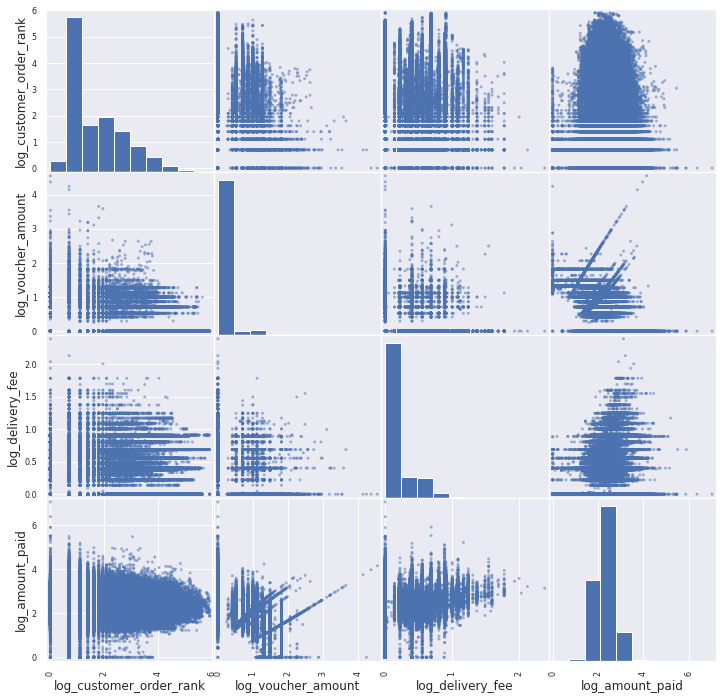

In [50]:
scatter_matrix(
    order_data[[
        'log_customer_order_rank',
        'log_voucher_amount',
        'log_delivery_fee',
        'log_amount_paid',
    ]],
    figsize=(12, 12),
);

We can see a very different picture here from the first scatter matrix.
We can observe a somewhat normal distribution of the data and it is now
possible to spot patterns, such as straight diagonal lines.
Clear examples in this case are:
- `log_voucher_amount` and `log_amount_paid`, probably
  due to fixed percentage discounts used for vouchers, so the larger the
  amount paid, the larger the discount in equal measure.
  Here there are also vertical and horizontal "features", which
  probably show when 1) no voucher was used and 2) the voucher paid for the whole order;
- `log_voucher_amount` and `log_delivery_fee` also show horizontal and vertical
  patterns for similar reasons.

Using these pattern could be useful for feature extraction, in order to
obtain a better predicting model.

### Store data

At this point we have a good starting point for analyzing individual data columns
and extract useful feature for the modelling stage of the analysis.
This will be done in the next notebook.
We need to store the table we have, possibly preserving the data types we have defined.
There are several way to do it.

One way is to use the JSON format with a specific pandas format that details the data schema.
This is convenient because it remains a human-readable text format while keeping
all the information on data types.
In a production situation one would preferably use a binary format such as parquet,
which is a lot more space efficient.

In [51]:
order_data.to_json("../data/order_data_dtypes_log.json", orient='table', indent=2)

To quickly check what the file looks like, we can look at the top of the file:

In [52]:
!head -45 ../data/order_data_dtypes_log.json

{
  "schema":{
    "fields":[
      {
        "name":"index",
        "type":"integer"
      },
      {
        "name":"order_datetime",
        "type":"datetime"
      },
      {
        "name":"customer_id",
        "type":"string"
      },
      {
        "name":"log_customer_order_rank",
        "type":"number"
      },
      {
        "name":"is_failed",
        "type":"boolean"
      },
      {
        "name":"log_voucher_amount",
        "type":"number"
      },
      {
        "name":"log_delivery_fee",
        "type":"number"
      },
      {
        "name":"log_amount_paid",
        "type":"number"
      },
      {
        "name":"restaurant_id",
        "type":"any",
        "constraints":{
          "enum":[
            "100053498",
            "100063498",
            "100073498",
            "100103498",
            "100163498",
